<body>
<h2>Bias Variance Trade-Off</h2>

<!--announcements-->
<blockquote>
    <center>
    <a href="http://blogs.worldbank.org/publicsphere/files/publicsphere/biased_processing.jpg"><img src="bias.jpg" width="600px" /></a>
    </center>
      <p><cite><center>"All of us show bias when it comes to what information we take in.<br>We typically focus on anything that agrees with the outcome we want."<br>
<b>--Noreena Hertz</b>
      </center></cite></p>
</blockquote>
<h3>Introduction</h3>

<p>
Recall that the squared error can be decomposed into <em>bias</em>, <em>variance</em> and <em>noise</em>: 
$$
    \underbrace{\mathbb{E}[(h_D(\mathbf{x}) - y)^2]}_\mathrm{Error} = \underbrace{\mathbb{E}[(h_D(\mathbf{x})-\bar{h}(\mathbf{x}))^2]}_\mathrm{Variance} + \underbrace{\mathbb{E}[(\bar{h}(\mathbf{x})-\bar{y}(\mathbf{x}))^2]}_\mathrm{Bias} + \underbrace{\mathbb{E}[(\bar{y}(\mathbf{x})-y(\mathbf{x}))^2]}_\mathrm{Noise}\nonumber
$$
We will now create a data set for which we can approximately compute this decomposition. 
The function <em><strong>`toydata`</strong></em> generates a binary data set with class $1$ and $2$. Both are sampled from Gaussian distributions:
$$
p(\mathbf{x}|y=1)\sim {\mathcal{N}}(0,{I}) \textrm { and } p(\mathbf{x}|y=2)\sim {\mathcal{N}}(\mu_2,{I}),
$$

where $\mathbf{\mu_2}=[1.75, 1.75]^\top$ (the global variable <em>OFFSET</em> $\!=\!2$ regulates these values: $\mathbf{\mu_2}=[$<em>OFFSET</em> $, $ <em>OFFSET</em>$]^\top$).
</p>

<h3>Computing noise, bias and variance</h3>
<p>
You will need to edit three functions:  <em><strong>`computeybar`</strong></em>,  <em><strong>`computehbar`</strong></em>, and <em><strong>`computevariance`</strong></em>. First take a look at <strong>`biasvariancedemo`</strong> and make sure you understand where each function should be called and how they contribute to the Bias/Variance/Noise decomposition. <br/><br/>
</p>

**Libraries**: Before we get started we need to install a few libraries. You can do this by executing the following code.

In [18]:
import numpy as np
from numpy.matlib import repmat
import matplotlib
import matplotlib.pyplot as plt
import helper as h

%matplotlib inline

**`h.toydata` Helper Function**: `h.toydata` is a helper function used to generate the the binary data with n/2 values in class 1 and n/2 values in class 2. With class 1 being the label for data drawn from a normal distribution having mean 0 and sigma 1. And class 2 being the label for data drawn from a normal distribution with mean OFFSET and sigma 1.

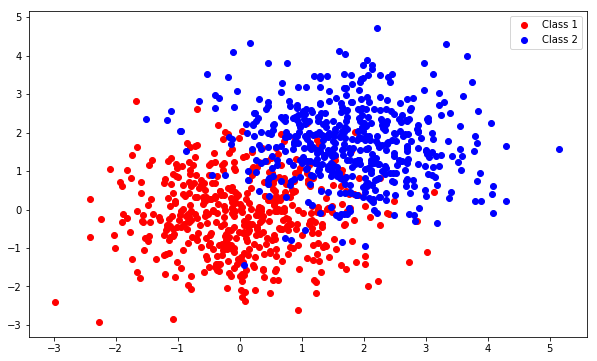

In [19]:
OFFSET = 1.75
X, y = h.toydata(OFFSET, 1000)

# Visualize the generated data
ind1 = y == 1
ind2 = y == 2
plt.figure(figsize=(10,6))
plt.scatter(X[ind1, 0], X[ind1, 1], c='r', marker='o', label='Class 1')
plt.scatter(X[ind2, 0], X[ind2, 1], c='b', marker='o', label='Class 2')
plt.legend();

<p>
(a) <strong>Noise:</strong> First we focus on the noise. For this, you need to compute $\bar y(\mathbf{x})$ in  <em><strong>`computeybar`</strong></em>. You can compute the probability $p(\mathbf{x}|y)$ with the equations $p(\mathbf{x}|y=1)\sim {\mathcal{N}}(0,{I}) \textrm { and } p(\mathbf{x}|y=2)\sim {\mathcal{N}}(\mathbf{\mu_2},{I})$. Then use Bayes rule to compute $p(y|\mathbf{x})$. <br/><br/>
<strong>Note:</strong> You may want to use the function <em>`normpdf`</em>, which is defined for  you in <em><strong>`computeybar`</strong></em>.
<br/><br/></p>


In [20]:
def computeybar(xTe, OFFSET):
    """
    function [ybar]=computeybar(xTe, OFFSET);

    computes the expected label 'ybar' for a set of inputs x
    generated from two standard Normal distributions (one offset by OFFSET in
    both dimensions.)

    INPUT:
    xTe : nx2 array of n vectors with 2 dimensions
    OFFSET    : The OFFSET passed into the toyData function. The difference in the
                mu of labels class1 and class2 for toyData.

    OUTPUT:
    ybar : a nx1 vector of the expected labels for vectors xTe
    """
    n, d = xTe.shape
    ybar = np.zeros(n)
    
    # Feel free to use the following function to compute p(x|y), or not
    # normal distribution is default mu = 0, sigma = 1.
    normpdf = lambda x, mu, sigma: np.exp(-0.5 * np.power((x - mu) / sigma, 2)) / (np.sqrt(2 * np.pi) * sigma)
    
    ### BEGIN SOLUTION
    class1 = normpdf(xTe, 0, 1)
    class2 = normpdf(xTe, OFFSET, 1)
    
    class1 = np.multiply(class1[:,0], class1[:,1])
    class2 = np.multiply(class2[:,0], class2[:,1])
    
    num = class1 + 2*class2
    den = class1 + class2
    
    ybar = num / den
    ### END SOLUTION
    return ybar

**Visualizing the Data**:
You can now see the error of the bayes classifier. Below is a plotting of the two classes of points and the misclassified points.

Error of Bayes classifier: 10.6%.


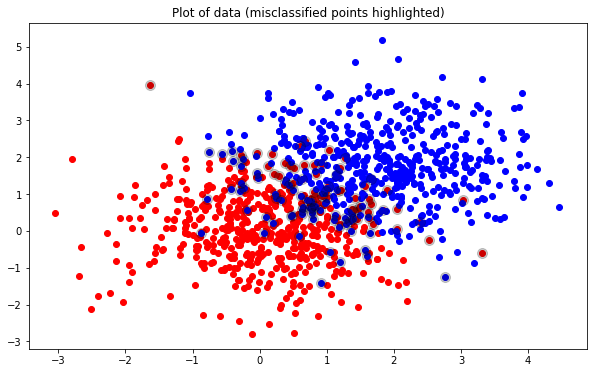

In [21]:
OFFSET = 1.75
np.random.seed(1)
xTe, yTe = h.toydata(OFFSET, 1000)

# compute Bayes Error
ybar = computeybar(xTe, OFFSET)
predictions = np.round(ybar)
errors = predictions != yTe
err = errors.sum() / len(yTe) * 100
print('Error of Bayes classifier: %.1f%%.' % err)

# plot data
ind1 = yTe == 1
ind2 = yTe == 2
plt.figure(figsize=(10,6))
plt.scatter(xTe[ind1, 0], xTe[ind1, 1], c='r', marker='o')
plt.scatter(xTe[ind2, 0], xTe[ind2, 1], c='b', marker='o')
plt.scatter(xTe[errors, 0], xTe[errors, 1], c='k', s=100, alpha=0.2)
plt.title("Plot of data (misclassified points highlighted)")
plt.show()

In [22]:
def test_ybar1():
    OFFSET = 2
    n = 1000
    xTe, yTe = h.toydata(OFFSET, n) # Generate n datapoints
    ybar = computeybar(xTe, OFFSET)
    
    return ybar.shape == (n, ) # the output of your ybar should be a n dimensional array

def test_ybar2():
    OFFSET = 50
    # Create an easy dataset
    # We set sigma=1 and since the mean is far apart,
    # the noise is negligible
    xTe = np.array([
        [49.308783, 49.620651], 
        [1.705462, 1.885418], 
        [ 51.192402, 50.256330],
        [0.205998, -0.089885],
        [50.853083, 51.833237]])  
    yTe = np.array([2, 1, 2, 1, 2])
    
    ybar = computeybar(xTe, OFFSET)
    noise = np.mean(np.power(yTe - ybar, 2)) # calculate the noise
    return np.isclose(noise, 0)

def test_ybar3():
    OFFSET = 3;

    xTe = np.array([
        [0.45864, 0.71552],
        [2.44662, 1.68167],
        [1.00345, 0.15182],
        [-0.10560, -0.48155],
        [3.07264, 3.81535],
        [3.13035, 2.72151],
        [2.25265, 3.78697]])
    yTe = np.array([1, 2, 1, 1, 2, 2, 2])
    
    ybar = computeybar(xTe, OFFSET)
    noise = np.mean(np.power(yTe - ybar, 2)) # calculate the noise
    
    return noise < 0.0002 # make sure the noise is small

h.runtest(test_ybar1, 'test_ybar1')
h.runtest(test_ybar2, 'test_ybar2')
h.runtest(test_ybar3, 'test_ybar3')

Running Test: test_ybar1 ... ✔ Passed!
Running Test: test_ybar2 ... ✔ Passed!
Running Test: test_ybar3 ... ✔ Passed!


In [23]:
# Autograder test cell - worth 1 point
# runs test_ybar1
### BEGIN HIDDEN TESTS

OFFSET = 2
n = 1000
xTe, yTe = h.toydata(OFFSET, n) # Generate n datapoints
ybar = computeybar(xTe, OFFSET)

assert ybar.shape == (n, )

### END HIDDEN TESTS

In [24]:
# Autograder test cell - worth 1 point
# runs test_ybar2
### BEGIN HIDDEN TESTS

OFFSET = 50
# Create an easy dataset
# We set sigma=1 and since the mean is far apart,
# there wouldn't be any noise
xTe = np.array([
    [49.308783, 49.620651], 
    [1.705462, 1.885418], 
    [ 51.192402, 50.256330],
    [0.205998, -0.089885],
    [50.853083, 51.833237]])  
yTe = np.array([2, 1, 2, 1, 2])

ybar = computeybar(xTe, OFFSET)
noise = np.mean(np.power(yTe - ybar, 2)) # calculate the noise
assert np.isclose(noise, 0)

### END HIDDEN TESTS

In [25]:
# Autograder test cell - worth 1 point
# runs test_ybar3
### BEGIN HIDDEN TESTS

OFFSET = 3;

xTe = np.array([
    [0.45864, 0.71552],
    [2.44662, 1.68167],
    [1.00345, 0.15182],
    [-0.10560, -0.48155],
    [3.07264, 3.81535],
    [3.13035, 2.72151],
    [2.25265, 3.78697]])
yTe = np.array([1, 2, 1, 1, 2, 2, 2])

ybar = computeybar(xTe, OFFSET)
noise = np.mean(np.power(yTe - ybar, 2)) # calculate the noise

assert noise < 0.0002

### END HIDDEN TESTS

<p>
(b) <strong>Bias:</strong> For the bias, you will need $\bar{h}$. Although we cannot compute the expected value  $\bar h\!=\!\mathbb{E}[h]$, we can approximate it by training many $h_D$ and averaging their predictions. Edit the function <em><strong>`computehbar`</strong></em>. Average over <em>NMODELS</em> different $h_D$, each trained on a different data set of <em>Nsmall</em> inputs drawn from the same distribution. Feel free to call <em><strong>`toydata`</strong></em> to obtain more data sets. <br/><br/>
</p>

We are going to use the regression tree that we used in our previous project as our $h_D$ . To remind you, the following code shows you how to instantiate a decision tree:

In [26]:
xTr, yTr = h.toydata(OFFSET, 100)

# Create a regression tree with no restriction on its depth
# if you want to create a tree of depth k
# then call h.RegressionTree(depth=k)
tree = h.RegressionTree(depth=np.inf)

# To fit/train the regression tree
tree.fit(xTr, yTr)

# To use the trained regression tree to make prediction
pred = tree.predict(xTr)

In [27]:
def computehbar(xTe, depth, Nsmall, NMODELS, OFFSET):
    """
    function [hbar]=computehbar(xTe, sigma, lmbda, NSmall, NMODELS, OFFSET);

    computes the expected prediction of the average regression tree (hbar)
    for data set xTe. 

    The regression tree should be trained using data of size Nsmall and is drawn from toydata with OFFSET 
    

    The "infinite" number of models is estimated as an average over NMODELS. 

    INPUT:
    xTe       | nx2 matrix, of n column-wise input vectors (each 2-dimensional)
    depth     | Depth of the tree 
    NSmall    | Number of points to subsample
    NMODELS   | Number of Models to average over
    OFFSET    | The OFFSET passed into the toyData function. The difference in the
                mu of labels class1 and class2 for toyData.
    OUTPUT:
    hbar | nx1 vector with the predictions of hbar for each test input
    """
    n = xTe.shape[0]
    hbar = np.zeros(n)
    
    ### BEGIN SOLUTION
    for _ in range(NMODELS):
        ## fill in code here
        xTr, yTr = h.toydata(OFFSET, Nsmall)
        model = h.RegressionTree(depth=depth)
        model.fit(xTr, yTr)
        hbar += model.predict(xTe)
        
    hbar /= NMODELS
    ### END SOLUTION
    return hbar

In [28]:
def test_hbar1():
    OFFSET = 2
    depth = 2
    Nsmall = 10
    NMODELS = 10 
    n = 1000
    xTe, yTe = h.toydata(OFFSET, n)
    hbar = computehbar(xTe, depth, Nsmall, NMODELS, OFFSET)
    return hbar.shape == (n, ) # the dimension of hbar should be (n, )

def test_hbar2():
    OFFSET = 50
    # Create an easy dataset
    # We set sigma=1 and since the mean is far apart,
    # the noise is negligible
    xTe = np.array([
        [49.308783, 49.620651], 
        [1.705462, 1.885418], 
        [51.192402, 50.256330],
        [0.205998, -0.089885],
        [50.853083, 51.833237]])  
    yTe = np.array([2, 1, 2, 1, 2])
    
    depth = 2
    Nsmall = 10
    NMODELS = 1
    
    # since the mean is far apart, the tree should be able to learn perfectly
    hbar = computehbar(xTe, depth, Nsmall, NMODELS, OFFSET) 
    ybar = h.computeybar_grader(xTe, OFFSET)
    bias = np.mean(np.power(hbar-ybar,2))
    return np.isclose(bias, 0) # the bias should be close to zero

def test_hbar3():
    OFFSET = 3;

    xTe = np.array([
        [0.45864, 0.71552],
        [2.44662, 1.68167],
        [1.00345, 0.15182],
        [-0.10560, -0.48155],
        [3.07264, 3.81535],
        [3.13035, 2.72151],
        [2.25265, 3.78697]])
    yTe = np.array([1, 2, 1, 1, 2, 2, 2])
    
    depth = 3
    Nsmall = 10
    NMODELS = 100
    
    # set the random seed to ensure consistent behavior
    np.random.seed(1)
    hbar = computehbar(xTe, depth, Nsmall, NMODELS, OFFSET) 
    ybar = h.computeybar_grader(xTe, OFFSET)
    bias = np.mean(np.power(hbar-ybar, 2))
    return np.abs(bias - 0.0017) < 0.001 # the bias should be close to 0.007

h.runtest(test_hbar1, 'test_hbar1')
h.runtest(test_hbar2, 'test_hbar2')
h.runtest(test_hbar3, 'test_hbar3')

Running Test: test_hbar1 ... ✔ Passed!
Running Test: test_hbar2 ... ✔ Passed!
Running Test: test_hbar3 ... ✔ Passed!


In [29]:
# Autograder test cell - worth 1 point
# runs test_hbar1
### BEGIN HIDDEN TESTS

OFFSET = 2
depth = 2
Nsmall = 10
NMODELS = 10 
n = 1000
xTe, yTe = h.toydata(OFFSET, n)
hbar = computehbar(xTe, depth, Nsmall, NMODELS, OFFSET)
assert hbar.shape == (n, )

### END HIDDEN TESTS

In [30]:
# Autograder test cell - worth 1 point
# runs test_hbar2
### BEGIN HIDDEN TESTS

OFFSET = 50
# Create an easy dataset
# We set sigma=1 and since the mean is far apart,
# the noise is negligible
xTe = np.array([
    [49.308783, 49.620651], 
    [1.705462, 1.885418], 
    [51.192402, 50.256330],
    [0.205998, -0.089885],
    [50.853083, 51.833237]])  
yTe = np.array([2, 1, 2, 1, 2])

depth = 2
Nsmall = 10
NMODELS = 1

# since the mean is far apart, the tree should be able to learn perfectly
hbar = computehbar(xTe, depth, Nsmall, NMODELS, OFFSET) 
ybar = h.computeybar_grader(xTe, OFFSET)
bias = np.mean(np.power(hbar-ybar,2))
assert np.isclose(bias, 0) # the bias should be close to zero

### END HIDDEN TESTS

In [31]:
# Autograder test cell - worth 1 point
# runs test_hbar3
### BEGIN HIDDEN TESTS

OFFSET = 3;

xTe = np.array([
    [0.45864, 0.71552],
    [2.44662, 1.68167],
    [1.00345, 0.15182],
    [-0.10560, -0.48155],
    [3.07264, 3.81535],
    [3.13035, 2.72151],
    [2.25265, 3.78697]])
yTe = np.array([1, 2, 1, 1, 2, 2, 2])

depth = 3
Nsmall = 10
NMODELS = 100

# set the random seed to ensure consistent behavior
np.random.seed(1)
hbar = computehbar(xTe, depth, Nsmall, NMODELS, OFFSET) 
ybar = h.computeybar_grader(xTe, OFFSET)
bias = np.mean(np.power(hbar-ybar, 2))
assert np.abs(bias - 0.0017) < 0.001

### END HIDDEN TESTS


<p>(c) <strong>Variance:</strong> Finally, to compute the variance, we need to compute the term $\mathbb{E}[(h_D-\bar{h})^2]$. Once again, we can approximate this term by averaging over  <em>NMODELS</em> models. Edit the function <em><strong>`computevariance`</strong></em>. 
<br/></br></p>

In [32]:
def computevariance(xTe, depth, hbar, Nsmall, NMODELS, OFFSET):
    """
    function variance=computevariance(xTe,sigma,lmbda,hbar,Nsmall,NMODELS,OFFSET)

    computes the variance of classifiers trained on data sets from
    toydata.m with pre-specified "OFFSET" and 
    with kernel regression with sigma and lmbda
    evaluated on xTe. 
    the prediction of the average classifier is assumed to be stored in "hbar".

    The "infinite" number of models is estimated as an average over NMODELS. 

    INPUT:
    xTe       : nx2 matrix, of n column-wise input vectors (each 2-dimensional)
    depth     : Depth of the tree 
    hbar      : nx1 vector of the predictions of hbar on the inputs xTe
    Nsmall    : Number of samples drawn from toyData for one model
    NModel    : Number of Models to average over
    OFFSET    : The OFFSET passed into the toyData function. The difference in the
                mu of labels class1 and class2 for toyData.
    """
    n = xTe.shape[0]
    variance = np.zeros(n)
    
    ### BEGIN SOLUTION
    for j in range(NMODELS):
        ## fill in code here
        xTr, yTr = h.toydata(OFFSET, Nsmall)
        model = h.RegressionTree(depth=depth)
        model.fit(xTr, yTr)
        variance += np.square(hbar - model.predict(xTe))
    
    variance = np.mean(variance)/NMODELS
    
    ### END SOLUTION
    return variance

In [34]:
def test_variance1():
    OFFSET = 2
    depth = 2
    Nsmall = 10
    NMODELS = 10 
    n = 1000
    xTe, yTe = h.toydata(OFFSET, n)
    hbar = h.computehbar_grader(xTe, depth, Nsmall, NMODELS, OFFSET)
    var = computevariance(xTe, depth, hbar, Nsmall, NMODELS, OFFSET)
    return np.isscalar(var) # variance should be a scalar

def test_variance2():
    OFFSET = 50
    # Create an easy dataset
    # We set sigma=1 and since the mean is far apart,
    # the noise is negligible
    xTe = np.array([
        [49.308783, 49.620651], 
        [1.705462, 1.885418], 
        [51.192402, 50.256330],
        [0.205998, -0.089885],
        [50.853083, 51.833237]])  
    yTe = np.array([2, 1, 2, 1, 2])
    
    depth = 2
    Nsmall = 10
    NMODELS = 10
    
    # since the noise is negligible, the tree should be able to learn perfectly
    hbar = h.computehbar_grader(xTe, depth, Nsmall, NMODELS, OFFSET) 
    var = computevariance(xTe, depth, hbar, Nsmall, NMODELS, OFFSET)
    return np.isclose(var, 0) # the bias should be close to zero

def test_variance3():
    OFFSET = 3;

    xTe = np.array([
        [0.45864, 0.71552],
        [2.44662, 1.68167],
        [1.00345, 0.15182],
        [-0.10560, -0.48155],
        [3.07264, 3.81535],
        [3.13035, 2.72151],
        [2.25265, 3.78697]])
    yTe = np.array([1, 2, 1, 1, 2, 2, 2])
    
    depth = 3
    Nsmall = 10
    NMODELS = 100
    
    # set the random seed to ensure consistent behavior
    np.random.seed(1)
    # since the noise is negligible, the tree should be able to learn perfectly
    hbar = h.computehbar_grader(xTe, depth, Nsmall, NMODELS, OFFSET) 
    var = computevariance(xTe, depth, hbar, Nsmall, NMODELS, OFFSET)
    return np.abs(var - 0.0404) < 0.0015 # the variance should be close to 0.0404

h.runtest(test_variance1, 'test_variance1')
h.runtest(test_variance2, 'test_variance2')
h.runtest(test_variance3, 'test_variance3')

Running Test: test_variance1 ... ✔ Passed!
Running Test: test_variance2 ... ✔ Passed!
Running Test: test_variance3 ... ✔ Passed!


In [35]:
# Autograder test cell - worth 1 point
# runs test_variance1
### BEGIN HIDDEN TESTS

OFFSET = 2
depth = 2
Nsmall = 10
NMODELS = 10 
n = 1000
xTe, yTe = h.toydata(OFFSET, n)
hbar = h.computehbar_grader(xTe, depth, Nsmall, NMODELS, OFFSET)
var = computevariance(xTe, depth, hbar, Nsmall, NMODELS, OFFSET)
assert np.isscalar(var) # variance should be a scalar

### END HIDDEN TESTS

In [36]:
# Autograder test cell - worth 1 point
# runs test_variance2
### BEGIN HIDDEN TESTS

OFFSET = 50
# Create an easy dataset
# We set sigma=1 and since the mean is far apart,
# the noise is negligible
xTe = np.array([
    [49.308783, 49.620651], 
    [1.705462, 1.885418], 
    [51.192402, 50.256330],
    [0.205998, -0.089885],
    [50.853083, 51.833237]])  
yTe = np.array([2, 1, 2, 1, 2])

depth = 2
Nsmall = 10
NMODELS = 10

# since the noise is negligible, the tree should be able to learn perfectly
hbar = h.computehbar_grader(xTe, depth, Nsmall, NMODELS, OFFSET) 
var = computevariance(xTe, depth, hbar, Nsmall, NMODELS, OFFSET)
assert np.isclose(var, 0) # the bias should be close to zero

### END HIDDEN TESTS

In [38]:
# Autograder test cell - worth 1 point
# runs test_variance3
### BEGIN HIDDEN TESTS

OFFSET = 3;

xTe = np.array([
    [0.45864, 0.71552],
    [2.44662, 1.68167],
    [1.00345, 0.15182],
    [-0.10560, -0.48155],
    [3.07264, 3.81535],
    [3.13035, 2.72151],
    [2.25265, 3.78697]])
yTe = np.array([1, 2, 1, 1, 2, 2, 2])

depth = 3
Nsmall = 10
NMODELS = 100

# set the random seed to ensure consistent behavior
np.random.seed(1)
# since the noise is negligible, the tree should be able to learn perfectly
hbar = h.computehbar_grader(xTe, depth, Nsmall, NMODELS, OFFSET) 
var = computevariance(xTe, depth, hbar, Nsmall, NMODELS, OFFSET)
assert np.abs(var - 0.0404) < 0.0015 # the variance should be close to 0.0404

### END HIDDEN TESTS

<p>If you did everything correctly and call execute the following demo. You should see how the error decomposes (roughly) into bias, variance and noise for various depths.</p>
<br/>

In [39]:
# biasvariancedemo

OFFSET = 1.75
# how big is the training set size N
Nsmall = 75
# how big is a really big data set (approx. infinity)
Nbig = 7500
# how many models do you want to average over
NMODELS = 100
# What regularization constants to evaluate
depths = [0, 1, 2, 3, 4, 5, 6, np.inf]

# we store
Ndepths = len(depths)
lbias = np.zeros(Ndepths)
lvariance = np.zeros(Ndepths)
ltotal = np.zeros(Ndepths)
lnoise = np.zeros(Ndepths)
lsum = np.zeros(Ndepths)

# Different regularization constant classifiers
for i in range(Ndepths):
    depth = depths[i]
    # use this data set as an approximation of the true test set
    xTe,yTe = h.toydata(OFFSET, Nbig)
    
    # Estimate AVERAGE ERROR (TOTAL)
    total = 0
    for j in range(NMODELS):
        # Set the seed for consistent behavior
        xTr2,yTr2 = h.toydata(OFFSET, Nsmall)
        model = h.RegressionTree(depth=depth)
        model.fit(xTr, yTr)
        total += np.mean((model.predict(xTe) - yTe) ** 2)
    total /= NMODELS
    
    # Estimate Noise
    ybar = computeybar(xTe, OFFSET)
    noise = np.mean((yTe-ybar) ** 2)
    
    # Estimate Bias
    hbar = computehbar(xTe, depth, Nsmall, NMODELS, OFFSET)
    bias = np.mean((hbar-ybar) ** 2)
    
    # Estimating VARIANCE
    variance = computevariance(xTe,depth,hbar, Nsmall, NMODELS, OFFSET)
    
    # print and store results
    lbias[i] = bias
    lvariance[i] = variance
    ltotal[i] = total
    lnoise[i] = noise
    lsum[i] = lbias[i]+lvariance[i]+lnoise[i]
    
    if np.isinf(depths[i]):
        print('Depth infinite: Bias: %2.4f Variance: %2.4f Noise: %2.4f Bias+Variance+Noise: %2.4f Test error: %2.4f'
          % (lbias[i],lvariance[i],lnoise[i],lsum[i],ltotal[i]))
    else:
        print('Depth: %d: Bias: %2.4f Variance: %2.4f Noise: %2.4f Bias+Variance+Noise: %2.4f Test error: %2.4f'
          % (depths[i],lbias[i],lvariance[i],lnoise[i],lsum[i],ltotal[i]))
        

Depth: 0: Bias: 0.1716 Variance: 0.0000 Noise: 0.0764 Bias+Variance+Noise: 0.2480 Test error: 0.2500
Depth: 1: Bias: 0.0327 Variance: 0.0609 Noise: 0.0787 Bias+Variance+Noise: 0.1723 Test error: 0.1938
Depth: 2: Bias: 0.0065 Variance: 0.0424 Noise: 0.0785 Bias+Variance+Noise: 0.1274 Test error: 0.1708
Depth: 3: Bias: 0.0031 Variance: 0.0457 Noise: 0.0795 Bias+Variance+Noise: 0.1283 Test error: 0.1761
Depth: 4: Bias: 0.0024 Variance: 0.0686 Noise: 0.0753 Bias+Variance+Noise: 0.1462 Test error: 0.1692
Depth: 5: Bias: 0.0023 Variance: 0.0766 Noise: 0.0756 Bias+Variance+Noise: 0.1545 Test error: 0.1700
Depth: 6: Bias: 0.0028 Variance: 0.0866 Noise: 0.0769 Bias+Variance+Noise: 0.1663 Test error: 0.1660
Depth infinite: Bias: 0.0028 Variance: 0.0933 Noise: 0.0783 Bias+Variance+Noise: 0.1743 Test error: 0.1720


<IPython.core.display.Javascript object>


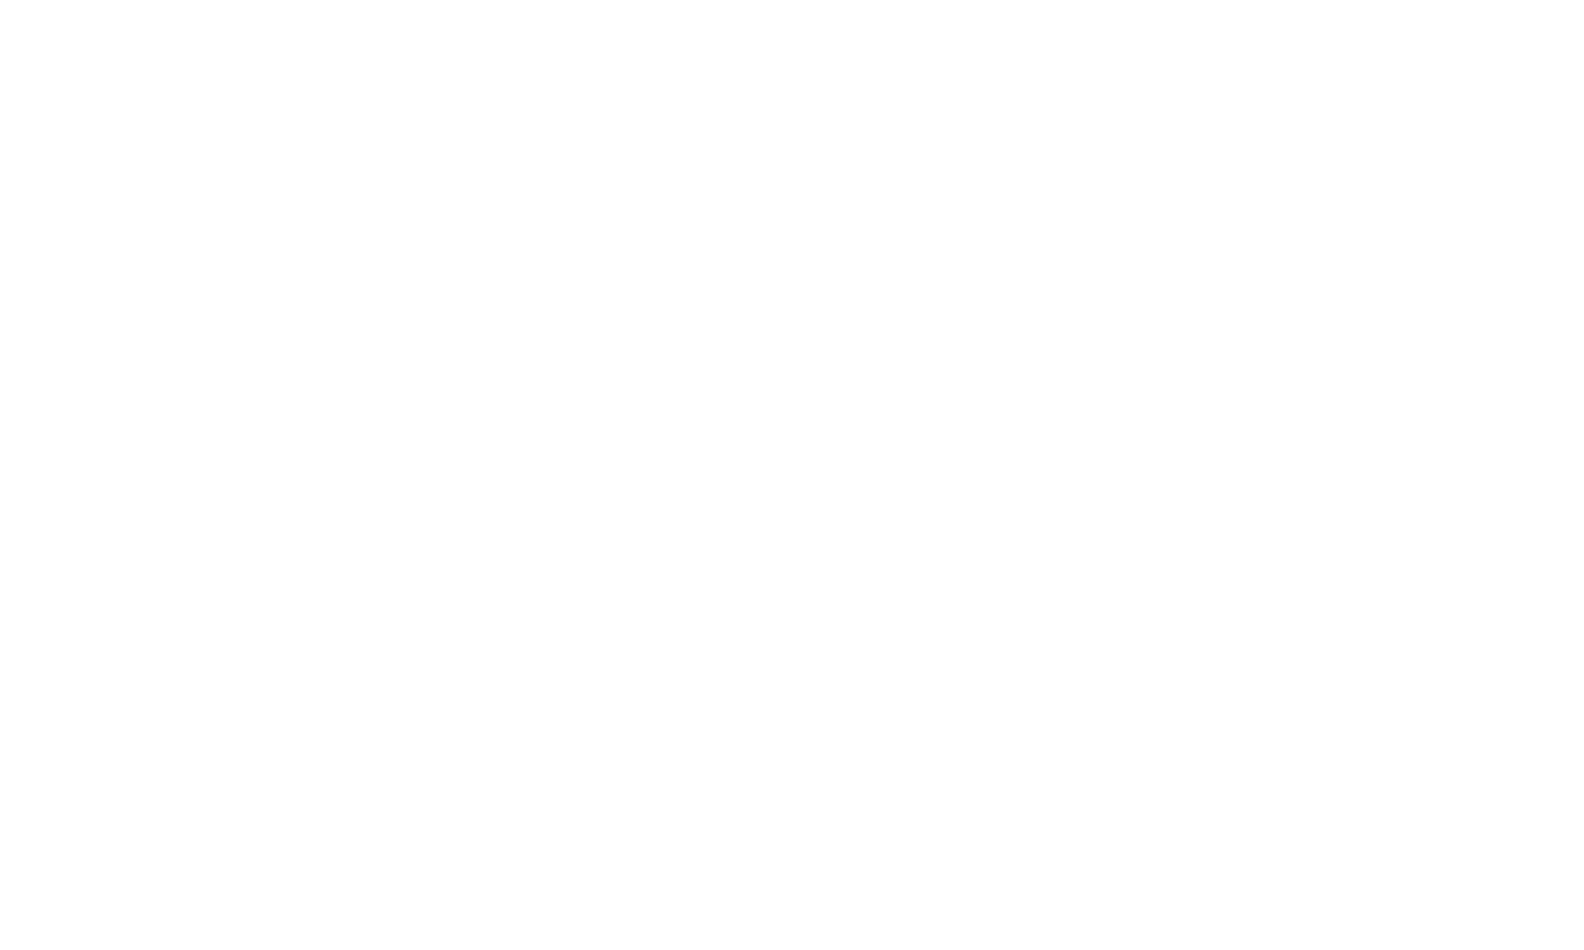

<IPython.core.display.Javascript object>


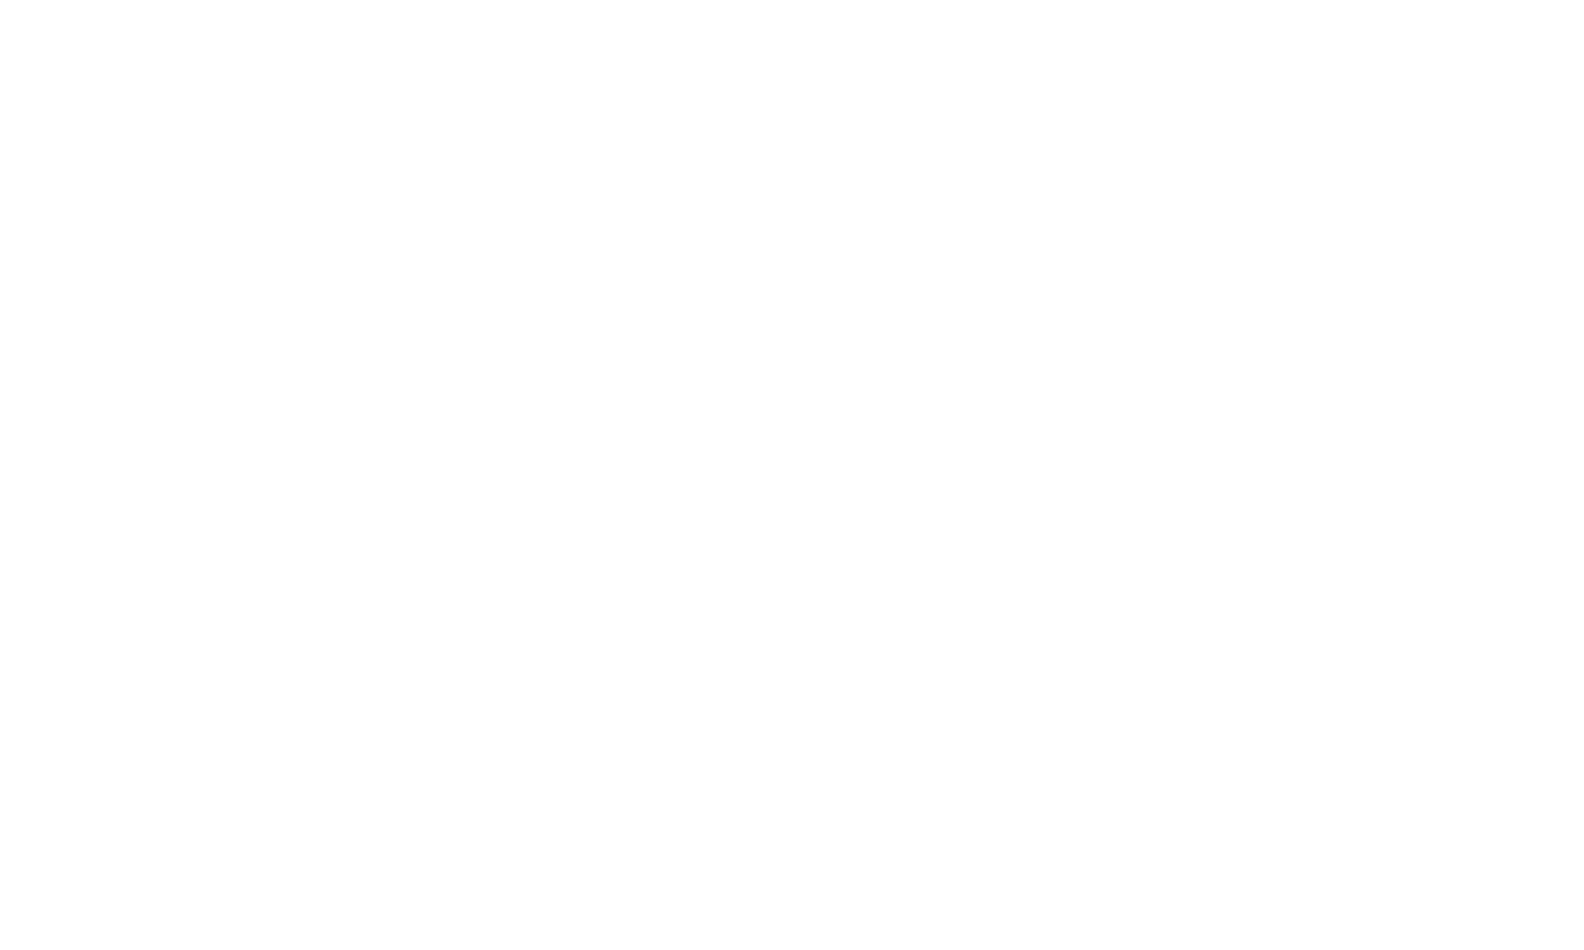

In [40]:
# plot results
%matplotlib notebook
plt.figure(figsize=(10,6))
plt.plot(lbias[:Ndepths], '*', c='r',linestyle='-',linewidth=2)
plt.plot(lvariance[:Ndepths], '*', c='k', linestyle='-',linewidth=2)
plt.plot(lnoise[:Ndepths], '*', c='g',linestyle='-',linewidth=2)
plt.plot(ltotal[:Ndepths], '*', c='b', linestyle='-',linewidth=2)
plt.plot(lsum[:Ndepths], '*', c='k', linestyle='--',linewidth=2)

plt.legend(["Bias","Variance","Noise","Test error","Bias+Var+Noise"]);
plt.xlabel("Depth",fontsize=18);
plt.ylabel("Squared Error",fontsize=18);
plt.xticks([i for i in range(Ndepths)], depths);